In [26]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

`Table of Contents`
**Student Information**
Student ID
Demographic Details
Study Habits
Parental Involvement
Extracurricular Activities
Academic Performance
Target Variable: GPA
Student Information
Student ID
**StudentID: A unique identifier assigned to each student (1001 to 3392).**
Demographic Details
**`Age`: The age of the students ranges from 15 to 18 years.**
**`Gender`: Gender of the students, where 0 represents Male and 1 represents Female.**
**`Ethnicity`: The ethnicity of the students, coded as follows:**
`0`: Caucasian
`1`: African American
`2`: Asian
`3`: Other
**ParentalEducation: The education level of the parents, coded as follows:**
`0`: None
`1`: High School
`2`: Some College
`3`: Bachelor's
`4`: Higher
`Study Habits`
**`StudyTimeWeekly`: Weekly study time in hours, ranging from 0 to 20.**
**`Absences`: Number of absences during the school year, ranging from 0 to 30.**
**`Tutoring`: Tutoring status, where 0 indicates No and 1 indicates Yes.**
`Parental Involvement`
**`ParentalSupport`: The level of parental support, coded as follows:**
`0`: None
`1`: Low
`2`: Moderate
`3`: High
`4`: Very High
Extracurricular Activities
**`Extracurricular`: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.**
**`Sports`: Participation in sports, where 0 indicates No and 1 indicates Yes.**
**`Music`: Participation in music activities, where 0 indicates No and 1 indicates Yes.**
**`Volunteering`: Participation in volunteering, where 0 indicates No and 1 indicates Yes.**
`Academic Performance`
**`GPA`: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.**
`Grade Class`
**`GradeClass`: Classification of students' grades based on GPA:**
`0`: 'A' (GPA >= 3.5)
`1`: 'B' (3.0 <= GPA < 3.5)
`2`: 'C' (2.5 <= GPA < 3.0)
`3`: 'D' (2.0 <= GPA < 2.5)
`4`: 'F' (GPA < 2.0)


In [27]:
# Cell 2: Load and Explore Data
df = pd.read_csv('Student_performance_data _.csv') 

# Display basic information
print("Initial Data Info:")
display(df.info())

# Check missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


None


Missing Values:


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


First 5 rows:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [28]:
# Cell 3: Handle Missing Values
# Numerical columns
numeric_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
                      'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 
                      'Volunteering', 'GradeClass']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing Values After Imputation:")
display(df.isnull().sum()) 

Missing Values After Imputation:


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [29]:
# Cell 6: Validate Data
# Age: 15-18 (high school range)
df = df[(df['Age'] >= 15) & (df['Age'] <= 18)]

# GPA: 0-4.0
df = df[(df['GPA'] >= 0) & (df['GPA'] <= 4.0)]

# Absences: 0-30 (reasonable per term)
df = df[(df['Absences'] >= 0) & (df['Absences'] <= 30)]

# StudyTimeWeekly: 0-20 hours
df = df[(df['StudyTimeWeekly'] >= 0) & (df['StudyTimeWeekly'] <= 20)]

print("Shape after validation:", df.shape)

Shape after validation: (2392, 15)


In [30]:
# Cell 7: Remove Duplicates
print("Shape before duplicate removal:", df.shape)
df.drop_duplicates(subset=['StudentID'], keep='first', inplace=True)
print("Shape after duplicate removal:", df.shape)

Shape before duplicate removal: (2392, 15)
Shape after duplicate removal: (2392, 15)


In [31]:
# Count duplicated rows in the DataFrame
sum(df.duplicated())

0

In [32]:
# Cell 9: Final Validation
print("Final Data Info:")
display(df.info())

print("\nBasic Statistics:")
display(df.describe())

Final Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


None


Basic Statistics:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [33]:
# Cell 10: Save Cleaned Data
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

Cleaned dataset saved as 'cleaned_dataset.csv'


**The dataset contains a total of 2,392 observations.**
**All values in the dataset are non-null and numerical.**
**There are no duplicate records.**

In [34]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]

# Identify categorical columns: columns that are not numerical and not 'GradeClass'
categorical_columns = df.columns.difference(numerical_columns).difference(['GradeClass']).to_list()

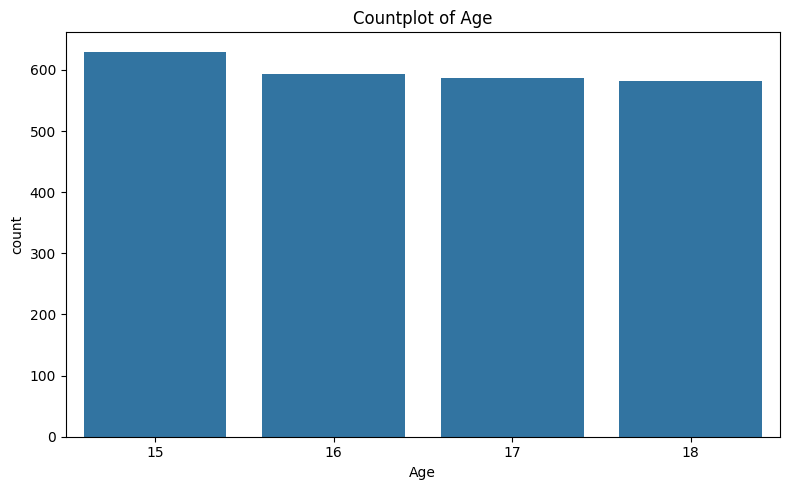

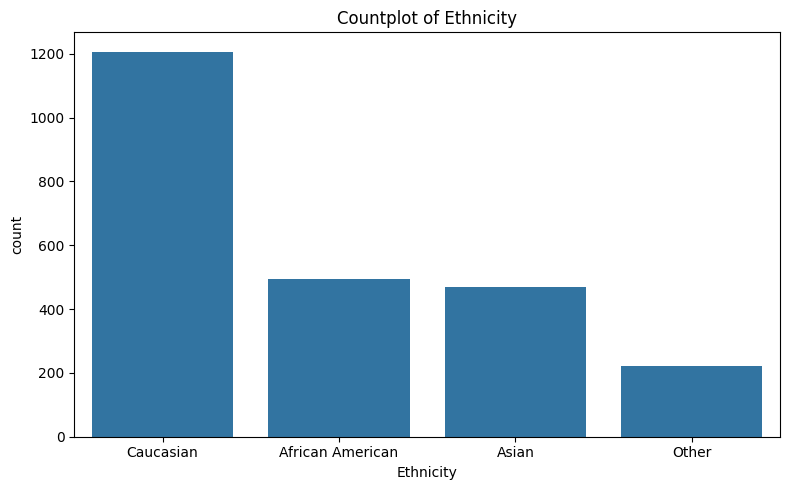

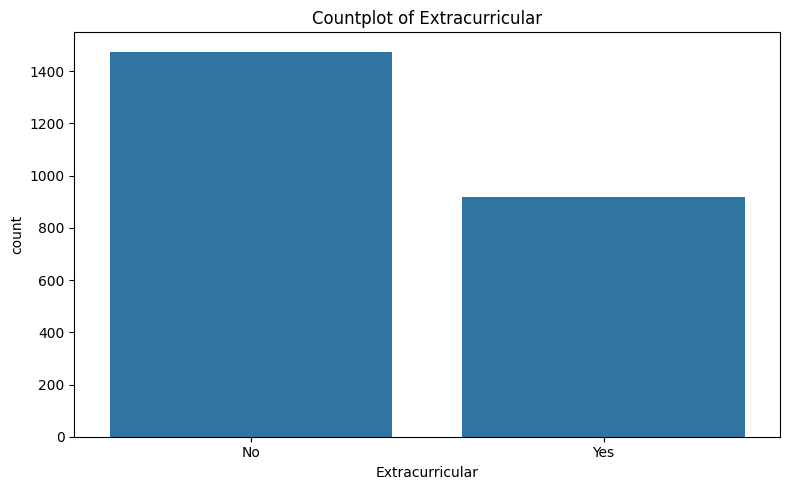

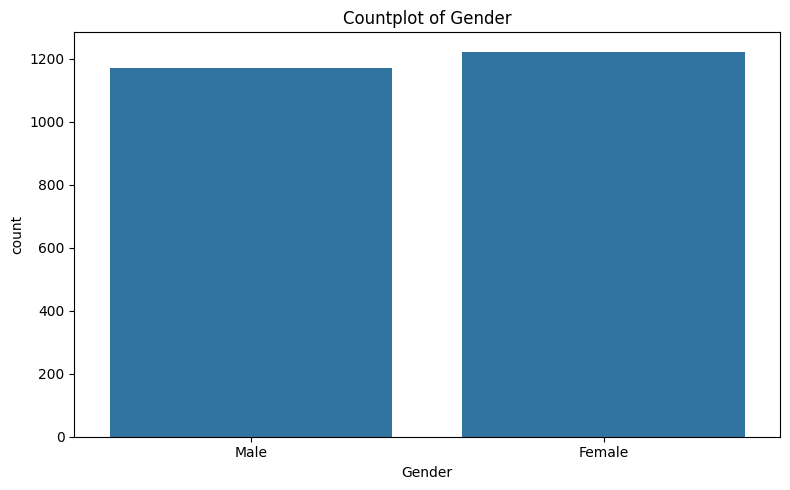

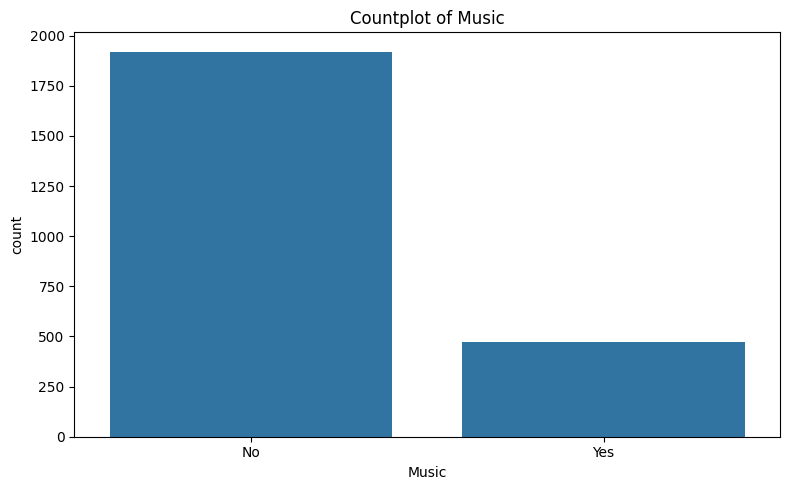

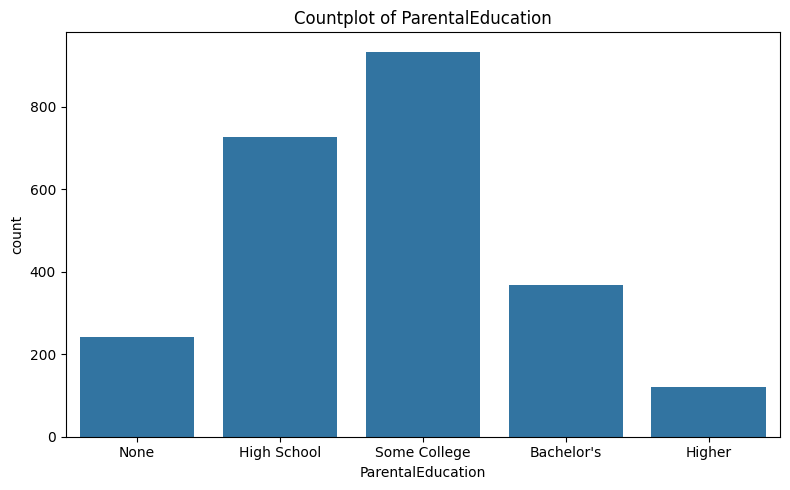

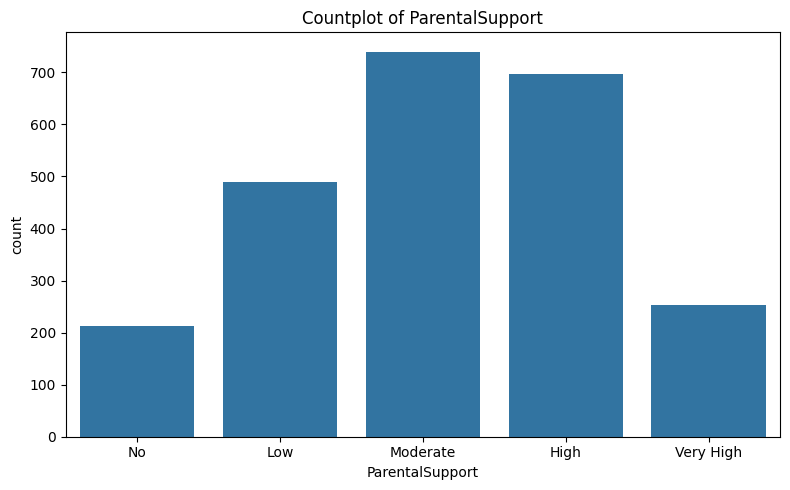

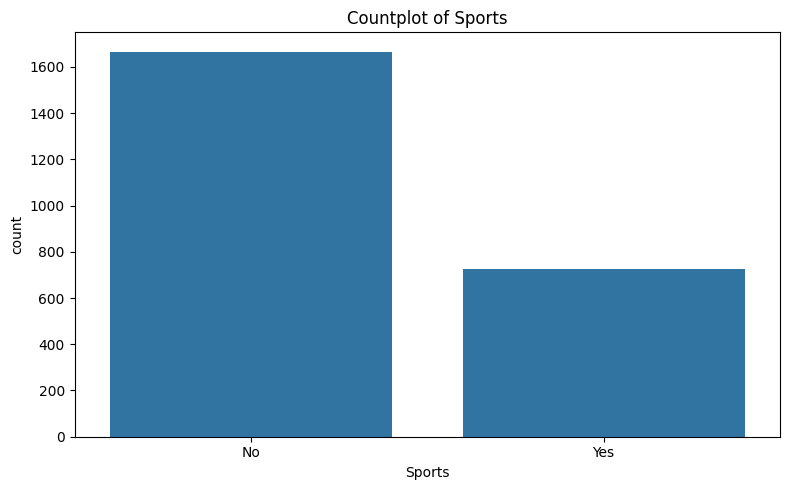

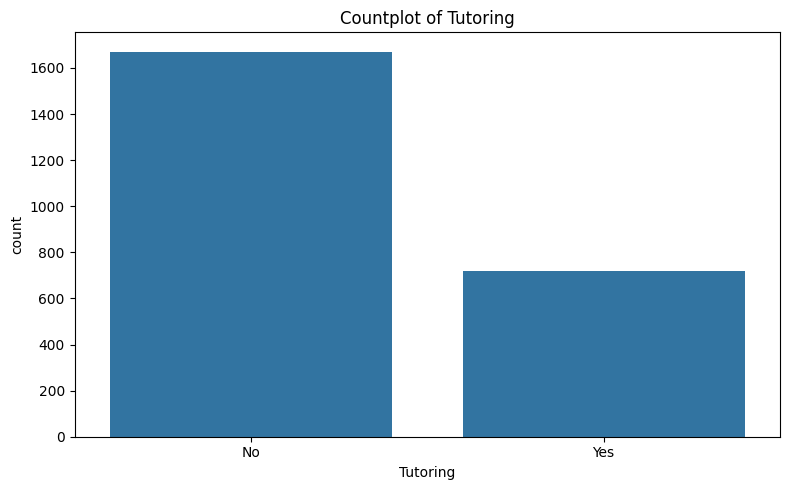

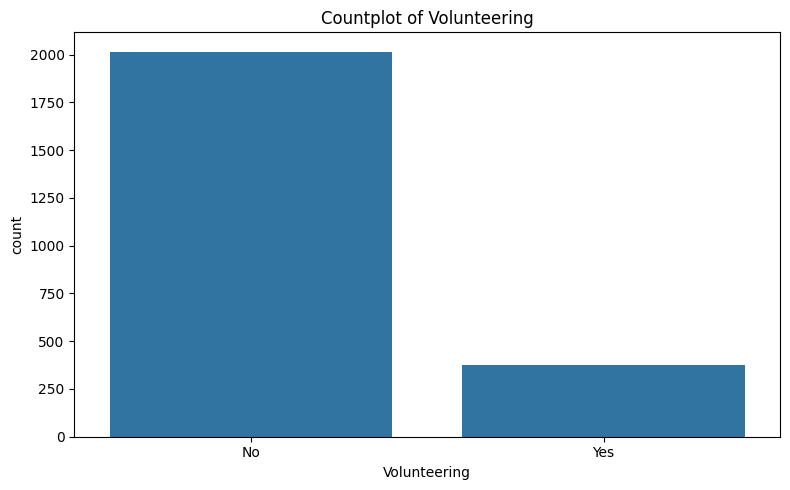

In [35]:
# Custom labels for the categorical columns
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.tight_layout()
    plt.show()

**The age distribution is balanced, with equal representation of individuals aged 15 to 18.
The most represented demographic is Caucasian.
Notably, both females and males are equally represented across the dataset.
A high number of individuals do not participate in music, sports, tutoring, volunteering or any other extracurricular activity.
Most parents have some college education, followed by high school graduates and then those with bachelor's degrees.
Parental support follows a normal distribution, with most parents providing moderate support.**

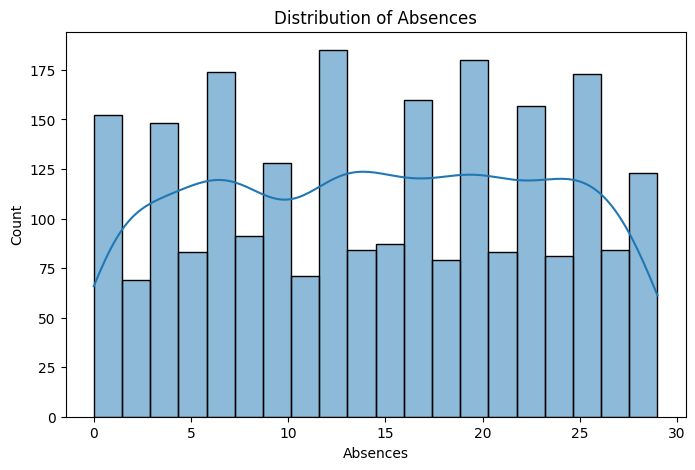

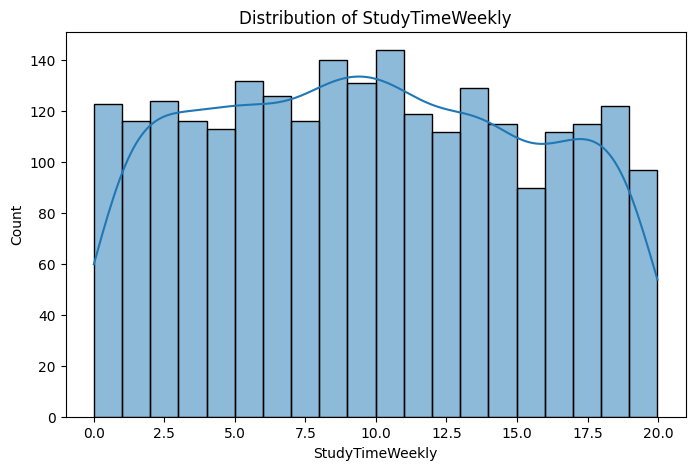

In [36]:
# Plot histogram for each numerical column
for column in ['Absences', 'StudyTimeWeekly']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

**The distribution of absences is highly variable. There is no clear pattern but significant fluctuations.**

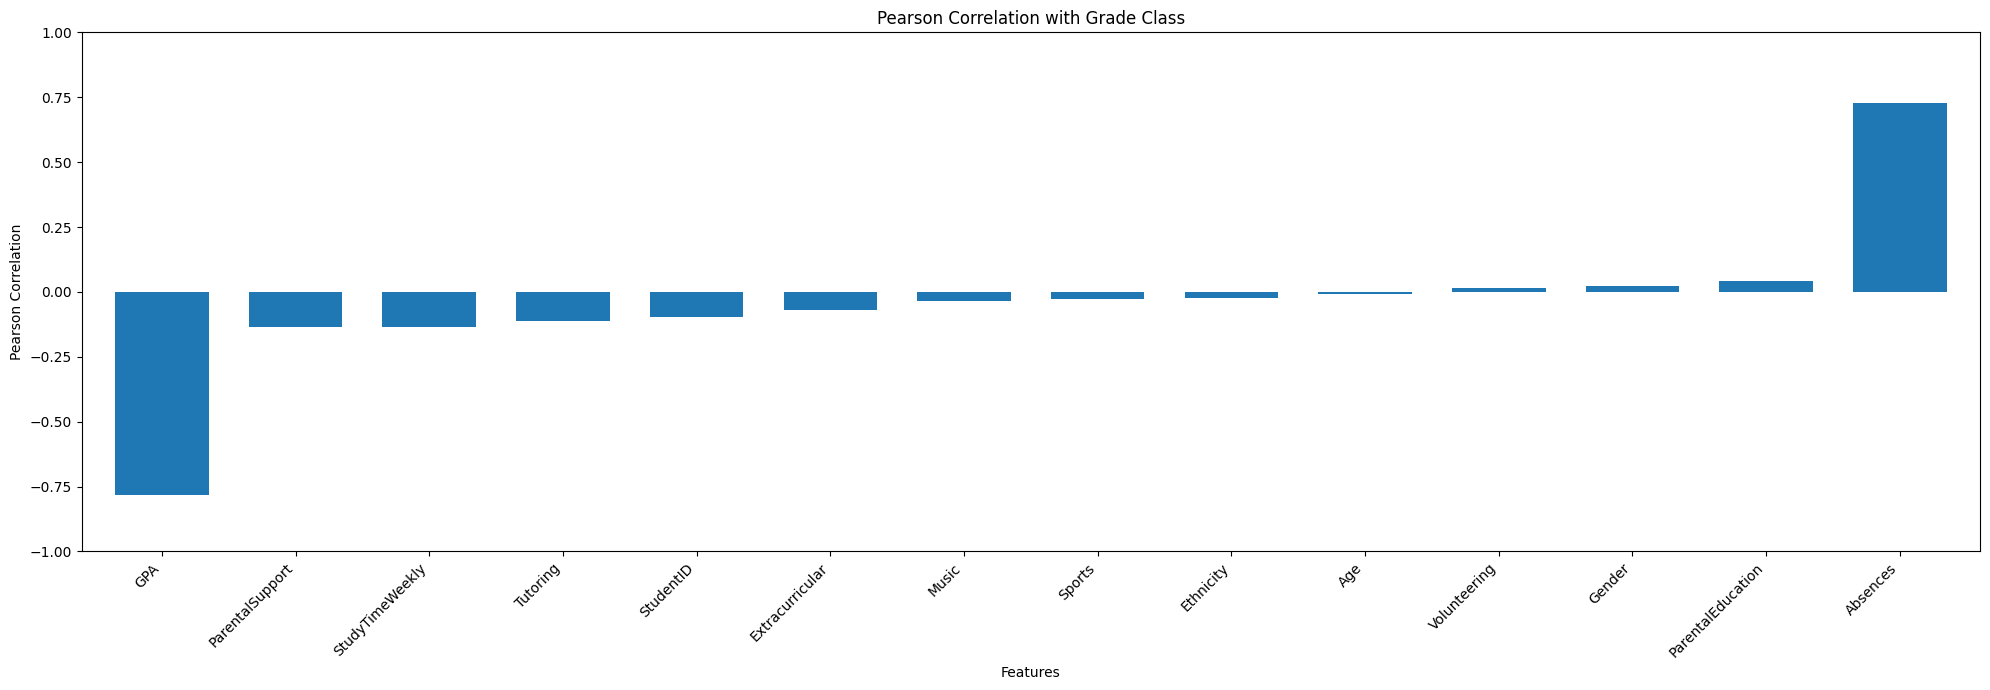

In [37]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['GradeClass'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Grade Class')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


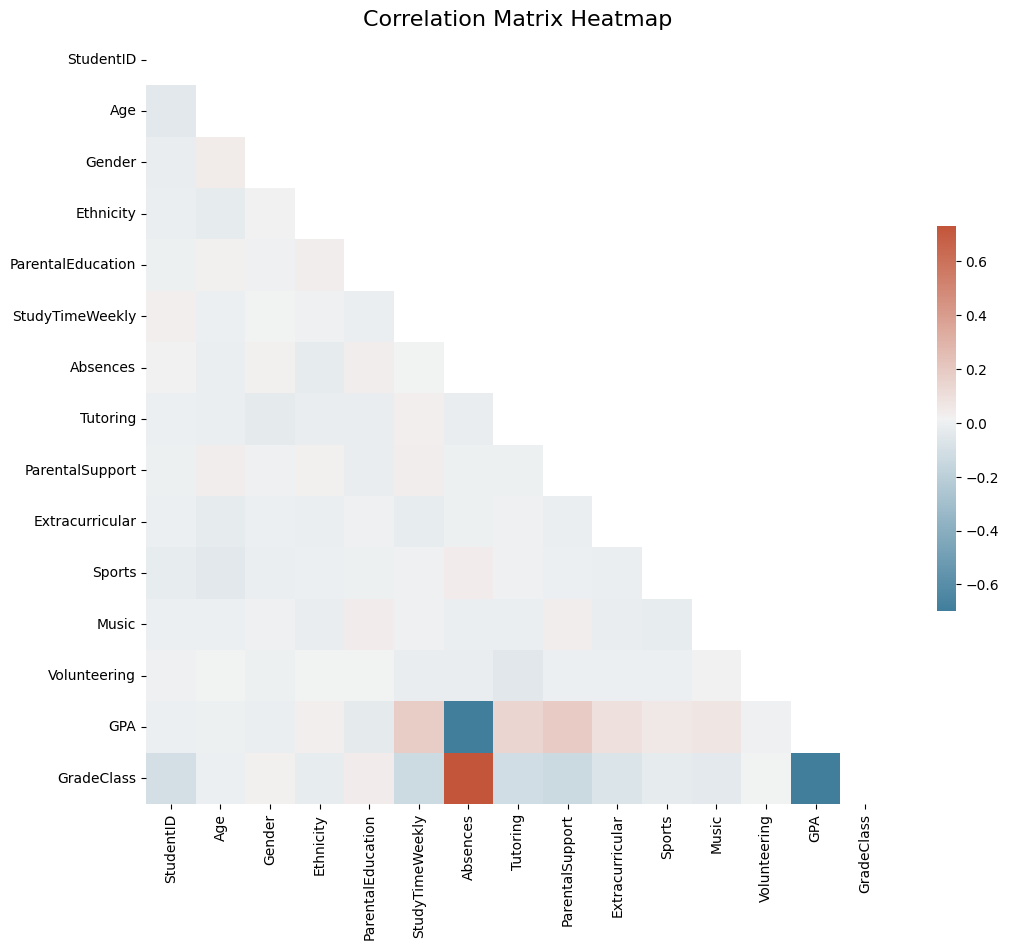

In [38]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Choose a diverging color scheme
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap=cmap, cbar_kws={"shrink": .5}, vmin=-0.7, mask=mask)
plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

In [39]:
# Calculate the correlation with the Grade Class and find the strongest correlation
grade_class_corr = df.corr(numeric_only=True)['GradeClass'].drop('GradeClass')
strongest_correlation = grade_class_corr.idxmax()
strongest_correlation_value = grade_class_corr.max()

print(f"The strongest correlation with the Grade Class is {strongest_correlation} with a value of {strongest_correlation_value:.2f}")

The strongest correlation with the Grade Class is Absences with a value of 0.73


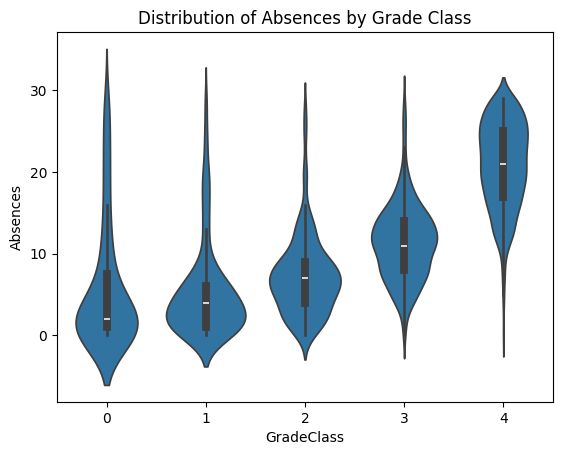

In [40]:
sns.violinplot(data=df, x='GradeClass', y='Absences')        
plt.title(f'Distribution of Absences by Grade Class')
plt.show()

**Distribution of Absences by Grade Class - Violin Plot**
        To visualize how the distribution of absences varies across grade classes. For example:
If the violin for GradeClass = 0 (e.g., "A" students) is narrow and peaks at a low number of absences, it suggests "A" students tend to have fewer absences.
If the violin for GradeClass = 4 (e.g., "F" students) is wider and extends to higher absence values, it indicates more variability and potentially higher absences among lower-performing students.

**The only variable that shows a high correlation with Grade Class is Absences, with a positive correlation of 0.73. This means that more Absences are associated with a higher Grade Class. This makes sense because, in our dataset, the best grade (A) is represented by 0 and the worst grade (F) is represented by 4.**
**The features are not correlated with each other, which is beneficial as it indicates a lack of multicollinearity, ensuring that each feature provides unique information for analysis.**

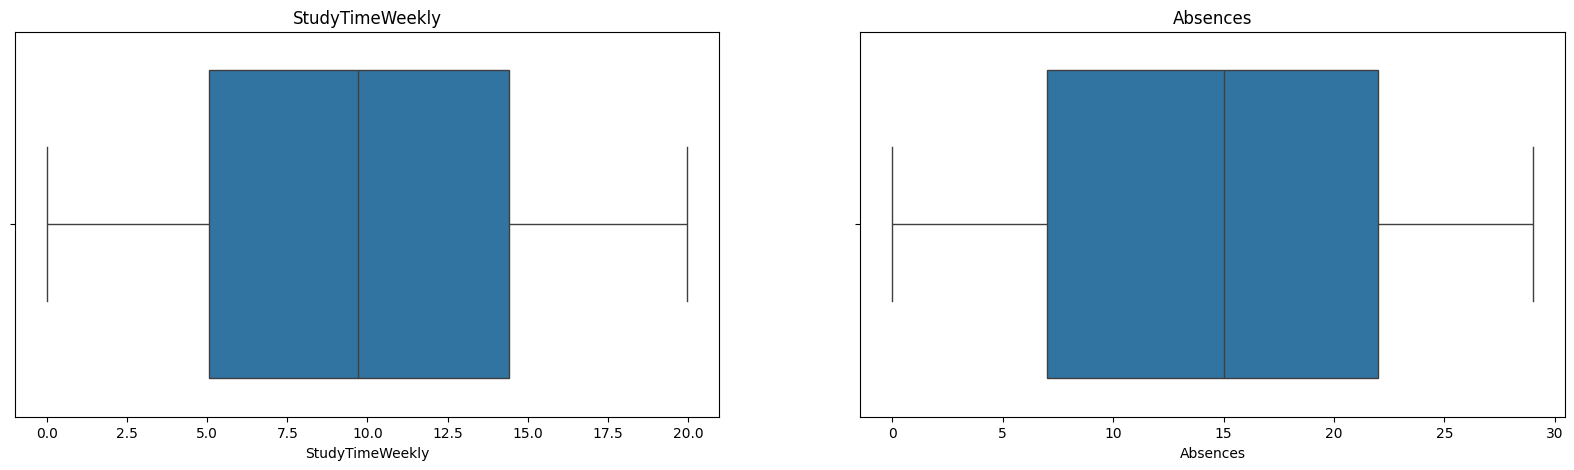

In [41]:
numerical_columns = ['StudyTimeWeekly', 'Absences']

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

for idx in range(2):
    # Create a boxplot for each column
    sns.boxplot(ax=ax[idx], x=df[numerical_columns[idx]])
    ax[idx].set_title(numerical_columns[idx])

plt.show()

In [42]:
# Calculate the Z-scores for the numerical columns
z_scores = stats.zscore(df[numerical_columns])

# Convert the NumPy array to a pandas DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)

# Generate descriptive statistics and round to 3 decimal places
z_scores_df.describe().round(3)


,StudyTimeWeekly,Absences
count,2392.000,2392.000
mean,-0.000,0.000
std,1.000,1.000
min,-1.729,-1.718
25%,-0.837,-0.891
50%,-0.012,0.054
75%,0.820,0.881
max,1.806,1.708


**There are no outliers in the dataset.**

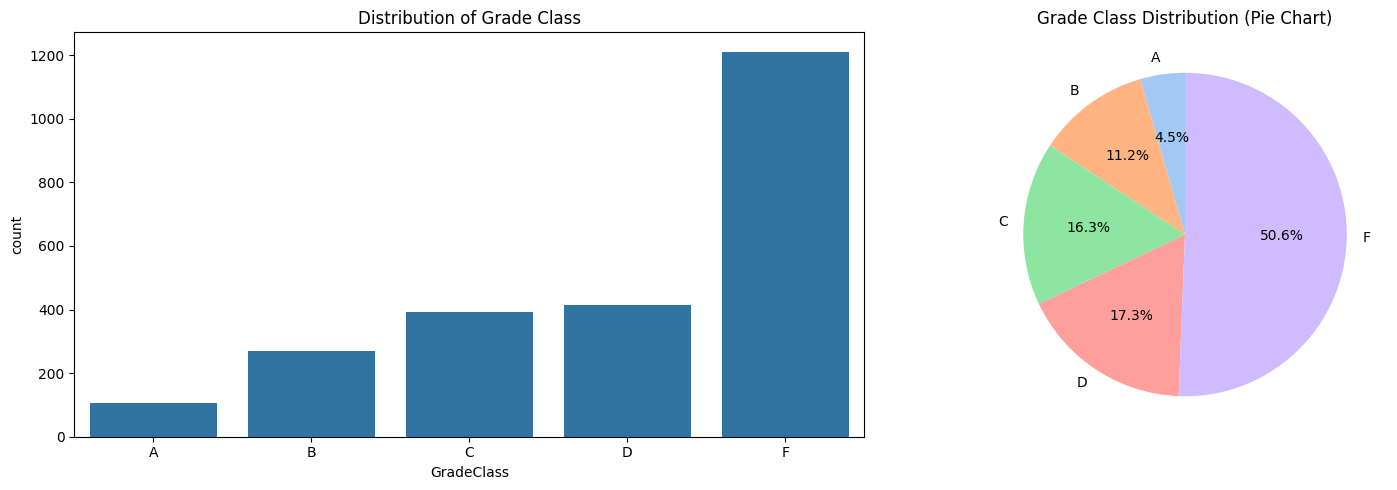

In [43]:
# Set custom labels
labels = ["A", "B", "C", "D", "F"]
ticks = range(len(labels))

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the count plot on the first subplot
sns.countplot(data=df, x='GradeClass', ax=axes[0])
axes[0].set_title('Distribution of Grade Class')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels)

# Calculate counts for the pie chart
grade_counts = df['GradeClass'].value_counts().sort_index()

# Plot the pie chart on the second subplot
axes[1].pie(grade_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Grade Class Distribution (Pie Chart)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

**1. Distribution of Grade Class - Left Subplot (Count Plot)**
        To visualize how many students fall into each grade category (e.g., how many got an "A" vs. a "D"). This helps identify the most and least common grades in the dataset.

**2. Grade Class Distribution (Pie Chart) - Right Subplot (Pie Chart)**
        To show the relative distribution of grade classes as proportions of the total. This complements the count plot by emphasizing the percentage breakdown rather than raw counts.

**The distribution of Grade Class reveals a significant imbalance, with Class E comprising approximately 50% of the dataset.**
**Classes A through D exhibit notably lower frequencies, with Class A representing only about 4.5%.**

In [44]:
# Data Validation (keeping GPA column)
df = df[(df['Age'] >= 15) & (df['Age'] <= 18)]
df = df[(df['GPA'] >= 0) & (df['GPA'] <= 4.0)]
df = df[(df['Absences'] >= 0) & (df['Absences'] <= 30)]
df = df[(df['StudyTimeWeekly'] >= 0) & (df['StudyTimeWeekly'] <= 20)]
df.drop_duplicates(subset=['StudentID'], keep='first', inplace=True)
df.drop('StudentID', axis=1, inplace=True)

# Separate features and target AFTER dropping StudentID
X = df.drop(['GPA', 'GradeClass'], axis=1)  # Now X won't include 'StudentID'
y = df['GPA']

In [45]:
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression Results:
R² Score: 0.9518
RMSE: 0.2039

Random Forest Regression Results:
R² Score: 0.9277
RMSE: 0.2498


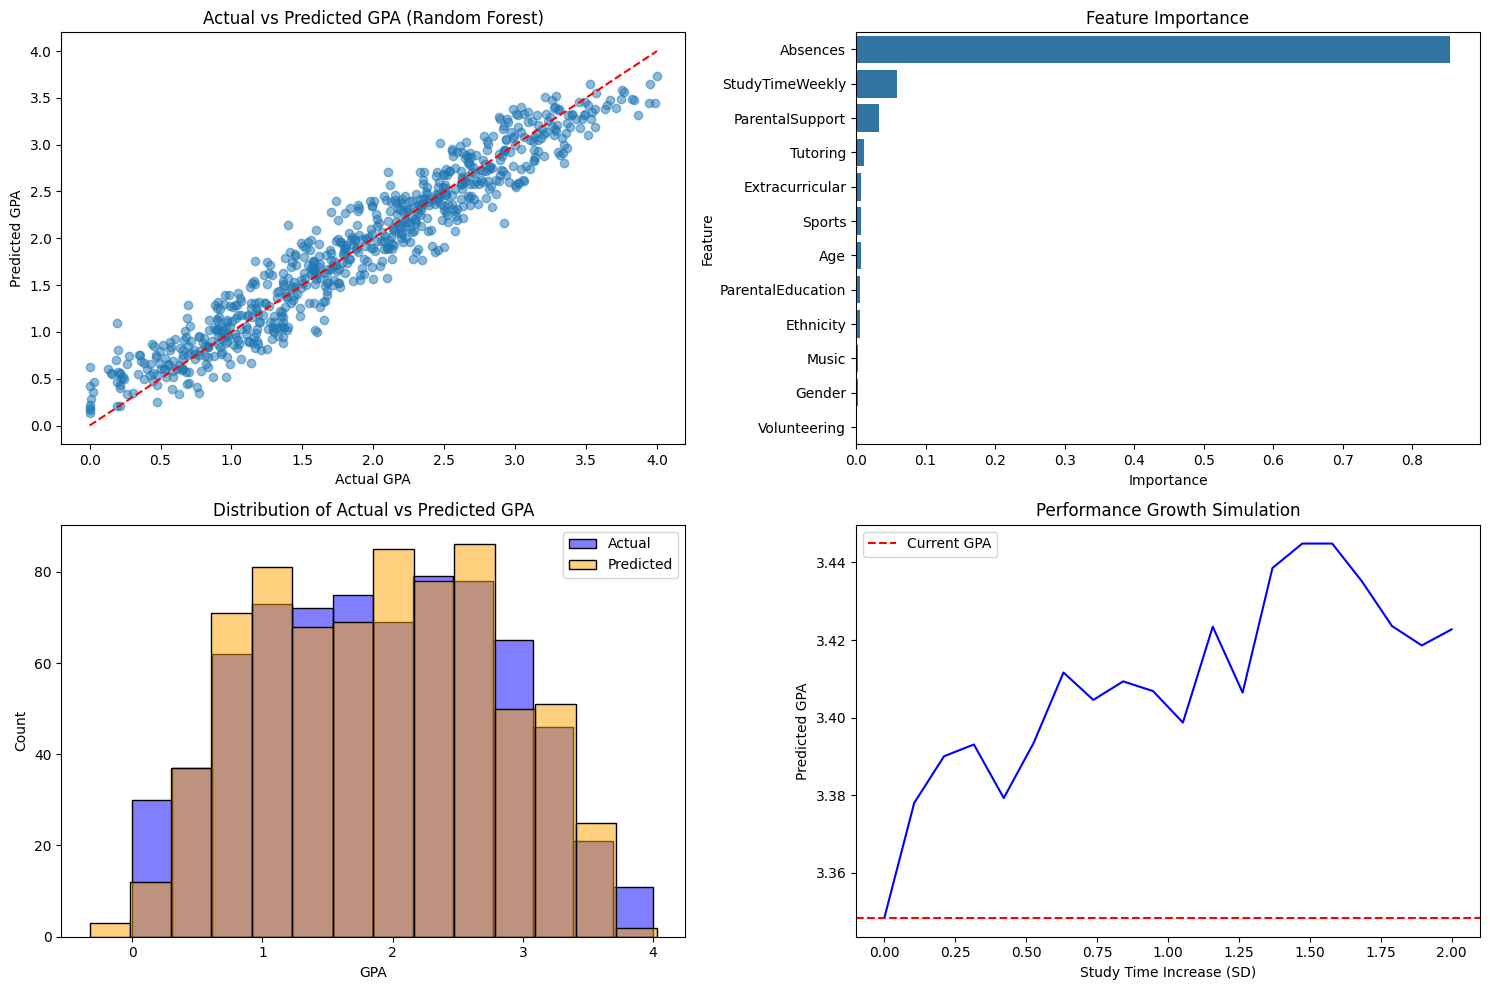


Predicted GPA for new student: 3.18


In [46]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=101)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Model Evaluation
print("Linear Regression Results:")
print(f"R² Score: {r2_score(y_test, lr_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.4f}")

print("\nRandom Forest Regression Results:")
print(f"R² Score: {r2_score(y_test, rf_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualization
plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted Plot
plt.subplot(2, 2, 1)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([0, 4], [0, 4], 'r--')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA (Random Forest)')

# 2. Feature Importance
plt.subplot(2, 2, 2)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')

# 3. Performance Distribution
plt.subplot(2, 2, 3)
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual')
sns.histplot(lr_pred, color='orange', alpha=0.5, label='Predicted')
plt.xlabel('GPA')
plt.title('Distribution of Actual vs Predicted GPA')
plt.legend()

# 4. Performance Growth Simulation
def simulate_growth(study_time_increase, absences_decrease, student_idx=0):
    original_data = X_test_scaled[student_idx].copy()
    current_pred = rf_model.predict([original_data])[0]
    
    # Modify study time and absences
    study_time_idx = X.columns.get_loc('StudyTimeWeekly')
    absences_idx = X.columns.get_loc('Absences')
    modified_data = original_data.copy()
    modified_data[study_time_idx] += study_time_increase
    modified_data[absences_idx] -= absences_decrease
    
    new_pred = rf_model.predict([modified_data])[0]
    return current_pred, new_pred

# Simulate growth for first test student
study_increases = np.linspace(0, 2, 20)  # Increase study time by up to 2 standard deviations
growth_preds = [simulate_growth(study_inc, 0)[1] for study_inc in study_increases]
current_gpa = simulate_growth(0, 0)[0]

plt.subplot(2, 2, 4)
plt.plot(study_increases, growth_preds, 'b-')
plt.axhline(y=current_gpa, color='r', linestyle='--', label='Current GPA')
plt.xlabel('Study Time Increase (SD)')
plt.ylabel('Predicted GPA')
plt.title('Performance Growth Simulation')
plt.legend()

plt.tight_layout()
plt.show()

# Example prediction for a new student
new_student = pd.DataFrame({
    'Age': [16],
    'Gender': [1],
    'Ethnicity': [0],
    'ParentalEducation': [2],
    'StudyTimeWeekly': [10],
    'Absences': [5],
    'Tutoring': [1],
    'ParentalSupport': [3],
    'Extracurricular': [1],
    'Sports': [0],
    'Music': [0],
    'Volunteering': [0]
})

# Get the columns that were actually used for training (after dropping 'StudentID')
trained_columns = [col for col in X.columns if col != 'StudentID']

# Ensure the column order matches the trained features
new_student = new_student[trained_columns]

# Scale the new data
new_student_scaled = scaler.transform(new_student)

# Make prediction
predicted_gpa = lr_model.predict(new_student_scaled)[0]
print(f"\nPredicted GPA for new student: {predicted_gpa:.2f}")

**1. Actual vs Predicted GPA (Random Forest) - Top Left (Subplot 2, 2, 1) :**
        To visually assess how well the Random Forest model predicts GPA compared to the actual values. A tight clustering around the red line suggests good performance.

**2. Feature Importance - Top Right (Subplot 2, 2, 2) :**
        To identify which variables (e.g., study time, absences, parental support) have the most impact on the model’s GPA predictions. This helps interpret the model and understand key drivers of student performance.

**3. Distribution of Actual vs Predicted GPA - Bottom Left (Subplot 2, 2, 3) :**
        To evaluate how well the predicted GPA distribution matches the actual distribution. If the orange histogram closely aligns with the blue one, the model captures the overall spread and shape of the GPA data well. Significant differences suggest the model might be under- or over-predicting certain GPA ranges.

**4. Performance Growth Simulation - Bottom Right (Subplot 2, 2, 4) :**
        To demonstrate the model’s sensitivity to changes in study time and simulate potential GPA improvement. If the blue line rises steeply, it suggests that increasing study time has a significant positive effect on predicted GPA, according to the model.

**The result might seem unimpressive at first glance.  Our objective was to predict `GPA` using the other available features, and we successfully achieved this with a accuracy score of `R² Score: 0.9518`.**

In [47]:
# Menu-driven program
def predict_gpa(student_data):
    student_scaled = scaler.transform(student_data)
    predicted_gpa = lr_model.predict(student_scaled)[0]
    return predicted_gpa

def display_menu():
    print("\n=== Student GPA Prediction Menu ===")
    print("1. Predict GPA for a specific student by row index")
    print("2. Predict GPA for all students")
    print("3. Predict GPA for a custom new student")
    print("4. Exit")

def predict_by_row_index():
    row_index = int(input(f"Enter row index (0 to {len(df)-1}): "))
    if 0 <= row_index < len(df):
        student_data = df.drop(['GPA', 'GradeClass'], axis=1).iloc[[row_index]]
        actual_gpa = df['GPA'].iloc[row_index]
        predicted_gpa = predict_gpa(student_data)
        print(f"\nRow Index: {row_index}")
        print(f"Actual GPA: {actual_gpa:.2f}")
        print(f"Predicted GPA: {predicted_gpa:.2f}")
    else:
        print("Invalid row index!")

def predict_all_students():
    print("\nPredicting GPA for all students...")
    X_scaled = scaler.transform(X)
    predicted_gpas = lr_model.predict(X_scaled)
    results = pd.DataFrame({
        'Row Index': df.index,
        'Actual GPA': df['GPA'],
        'Predicted GPA': predicted_gpas
    })
    print(results.to_string(index=False))
    save = input("\nSave results to CSV? (y/n): ")
    if save.lower() == 'y':
        results.to_csv('predicted_gpas.csv', index=False)
        print("Results saved to 'predicted_gpas.csv'")

def forecast_custom_student():
    print("\nEnter details for a new student:")
    new_student = pd.DataFrame({
        'Age': [int(input("Age (15-18): "))],
        'Gender': [int(input("Gender (0=Female, 1=Male): "))],
        'Ethnicity': [int(input("Ethnicity (0-3): "))],
        'ParentalEducation': [int(input("Parental Education (0-4): "))],
        'StudyTimeWeekly': [float(input("Study Time Weekly (0-20 hours): "))],
        'Absences': [int(input("Absences (0-30): "))],
        'Tutoring': [int(input("Tutoring (0=No, 1=Yes): "))],
        'ParentalSupport': [int(input("Parental Support (0-4): "))],
        'Extracurricular': [int(input("Extracurricular (0=No, 1=Yes): "))],
        'Sports': [int(input("Sports (0=No, 1=Yes): "))],
        'Music': [int(input("Music (0=No, 1=Yes): "))],
        'Volunteering': [int(input("Volunteering (0=No, 1=Yes): "))]
    })
    predicted_gpa = predict_gpa(new_student)
    print(f"\nPredicted GPA for new student: {predicted_gpa:.2f}")

# Main loop
while True:
    display_menu()
    choice = input("Enter your choice (1-4): ")
    
    if choice == '1':
        predict_by_row_index()
    elif choice == '2':
        predict_all_students()
    elif choice == '3':
        forecast_custom_student()
    elif choice == '4':
        print("Exiting program. Goodbye!")
        break
    else:
        print("Invalid choice! Please select 1-4.")


=== Student GPA Prediction Menu ===
1. Predict GPA for a specific student by row index
2. Predict GPA for all students
3. Predict GPA for a custom new student
4. Exit


Enter your choice (1-4):  1
Enter row index (0 to 2391):  34



Row Index: 34
Actual GPA: 1.14
Predicted GPA: 1.03

=== Student GPA Prediction Menu ===
1. Predict GPA for a specific student by row index
2. Predict GPA for all students
3. Predict GPA for a custom new student
4. Exit


Enter your choice (1-4):  2



Predicting GPA for all students...
 Row Index  Actual GPA  Predicted GPA
         0    2.929196       3.101616
         1    3.042915       3.102824
         2    0.112602       0.370229
         3    2.054218       2.038068
         4    1.288061       1.650601
         5    3.084184       3.064969
         6    2.748237       2.628157
         7    1.360143       1.390019
         8    2.896819       3.027597
         9    3.573474       3.677466
        10    2.147172       1.911737
        11    1.559595       1.536127
        12    1.520078       1.338910
        13    1.751581       1.568476
        14    2.396788       2.484651
        15    1.341521       1.574233
        16    2.232175       2.091712
        17    1.384404       1.557295
        18    0.469553       0.591291
        19    2.395784       2.374747
        20    2.778411       2.837782
        21    0.346894       0.821675
        22    0.312546       0.593672
        23    1.770132       1.577999
        24    


Save results to CSV? (y/n):  n



=== Student GPA Prediction Menu ===
1. Predict GPA for a specific student by row index
2. Predict GPA for all students
3. Predict GPA for a custom new student
4. Exit


Enter your choice (1-4):  3



Enter details for a new student:


Age (15-18):  15
Gender (0=Female, 1=Male):  1
Ethnicity (0-3):  2
Parental Education (0-4):  3
Study Time Weekly (0-20 hours):  13
Absences (0-30):  23
Tutoring (0=No, 1=Yes):  1
Parental Support (0-4):  1
Extracurricular (0=No, 1=Yes):  1
Sports (0=No, 1=Yes):  1
Music (0=No, 1=Yes):  1
Volunteering (0=No, 1=Yes):  1



Predicted GPA for new student: 1.57

=== Student GPA Prediction Menu ===
1. Predict GPA for a specific student by row index
2. Predict GPA for all students
3. Predict GPA for a custom new student
4. Exit


Enter your choice (1-4):  4


Exiting program. Goodbye!
